# Stroke Predicton
## Sohail Ahmed 3/23/2023
### email ahmedsohailkhan14@gmail.com

In [63]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [64]:
data = pd.read_csv('Fertile_Man_WHO_2020.csv')
data.head()

,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
0,Aboutorabi,3.2,27.0,86.4,35.0,20.0,15.0,65.0,NaN,NaN
1,Aboutorabi,0.8,136.0,108.8,47.0,35.0,12.0,53.0,NaN,NaN
2,Aboutorabi,2.0,71.0,142.0,49.0,42.0,7.0,51.0,NaN,NaN
3,Aboutorabi,1.0,35.0,35.0,50.0,28.0,22.0,50.0,NaN,NaN
4,Aboutorabi,2.0,46.0,92.0,51.0,28.0,33.0,49.0,NaN,NaN


In [65]:
data.tail()


,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
3584,Tang,1.7,23.0,39.1,53.0,52.0,1.0,NaN,82.0,25.0
3585,Tang,2.5,110.0,275.0,66.0,66.0,0.0,NaN,95.0,30.0
3586,Tang,2.0,109.0,218.0,64.0,44.0,20.0,36.0,NaN,11.0
3587,Tang,6.2,96.0,595.2,39.0,29.0,10.0,61.0,NaN,7.0
3588,Tang,3.0,36.0,108.0,54.0,38.0,16.0,46.0,NaN,11.0


In [66]:
data.shape

(3589, 10)

In [67]:
data.columns


Index(['Publisher', 'Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Total_Motility', 'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms'],
      dtype='object')

In [68]:
data.duplicated().sum()

220

In [69]:
data = data.drop_duplicates()

In [70]:
data.duplicated().sum()

0

In [71]:
data.describe()

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
count,3366.000000,3367.000000,3364.000000,3268.000000,3169.000000,3167.000000,2729.000000,1119.000000,3114.000000
mean,3.434153,84.037214,275.030948,64.354756,53.459973,11.277452,37.807129,77.534406,16.615928
std,1.552695,65.351050,235.676198,14.124526,14.123084,9.790083,12.395575,13.636622,11.433464
min,0.100000,0.900000,2.520000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000
25%,2.300000,37.000000,111.724875,55.638130,45.000000,4.000000,30.000000,70.000000,8.000000
50%,3.100000,68.000000,214.000000,64.000000,54.328358,8.000000,37.000000,78.000000,14.000000
75%,4.225000,112.000000,370.768250,73.000000,62.310030,15.000000,45.000000,89.000000,23.000000
max,12.500000,532.000000,3115.200000,100.000000,94.000000,56.000000,100.000000,100.000000,76.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 3588
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3369 non-null   object 
 1   Semen_Volume              3366 non-null   float64
 2   Sperm_Concentration       3367 non-null   float64
 3   Total_Number              3364 non-null   float64
 4   Total_Motility            3268 non-null   float64
 5   Progressive_Motility      3169 non-null   float64
 6   Non-progressive_Motility  3167 non-null   float64
 7   Immotile_Spermatozoa      2729 non-null   float64
 8   Vitality                  1119 non-null   float64
 9   Normal_Forms              3114 non-null   float64
dtypes: float64(9), object(1)
memory usage: 289.5+ KB


In [73]:
data.isnull().sum()


Publisher                      0
Semen_Volume                   3
Sperm_Concentration            2
Total_Number                   5
Total_Motility               101
Progressive_Motility         200
Non-progressive_Motility     202
Immotile_Spermatozoa         640
Vitality                    2250
Normal_Forms                 255
dtype: int64

In [74]:
data["Semen_Volume"]=data["Semen_Volume"].fillna(data["Semen_Volume"].mean())

In [75]:
data["Sperm_Concentration"]=data["Sperm_Concentration"].fillna(data["Sperm_Concentration"].mean())

In [76]:
data["Total_Number"]=data["Total_Number"].fillna(data["Total_Number"].mean())

In [77]:
data["Total_Motility"]=data["Total_Motility"].fillna(data["Total_Motility"].mean())

In [78]:
data["Progressive_Motility"]=data["Progressive_Motility"].fillna(data["Progressive_Motility"].mean())

In [79]:
data["Non-progressive_Motility"]=data["Non-progressive_Motility"].fillna(data["Non-progressive_Motility"].mean())

In [80]:
data["Immotile_Spermatozoa"]=data["Immotile_Spermatozoa"].fillna(data["Immotile_Spermatozoa"].mean())

In [81]:
data["Vitality"]=data["Vitality"].fillna(data["Vitality"].mean())

In [82]:
data["Normal_Forms"]=data["Normal_Forms"].fillna(data["Normal_Forms"].mean())

In [83]:
data.isnull().sum()

Publisher                   0
Semen_Volume                0
Sperm_Concentration         0
Total_Number                0
Total_Motility              0
Progressive_Motility        0
Non-progressive_Motility    0
Immotile_Spermatozoa        0
Vitality                    0
Normal_Forms                0
dtype: int64

In [84]:
data.nunique()

Publisher                     10
Semen_Volume                 373
Sperm_Concentration          669
Total_Number                1747
Total_Motility               495
Progressive_Motility         494
Non-progressive_Motility     383
Immotile_Spermatozoa         490
Vitality                      67
Normal_Forms                 121
dtype: int64

In [85]:
data['Publisher'].unique()


array(['Aboutorabi', 'Auger', 'Baker', 'Evgeni', 'Haugen', 'Jensen',
       'Lotti', 'Swan', 'Zedan', 'Tang'], dtype=object)

In [86]:
data['Publisher'].value_counts()


Tang          1050
Auger          826
Swan           487
Baker          206
Jensen         199
Zedan          170
Aboutorabi     168
Lotti          105
Haugen          82
Evgeni          76
Name: Publisher, dtype: int64

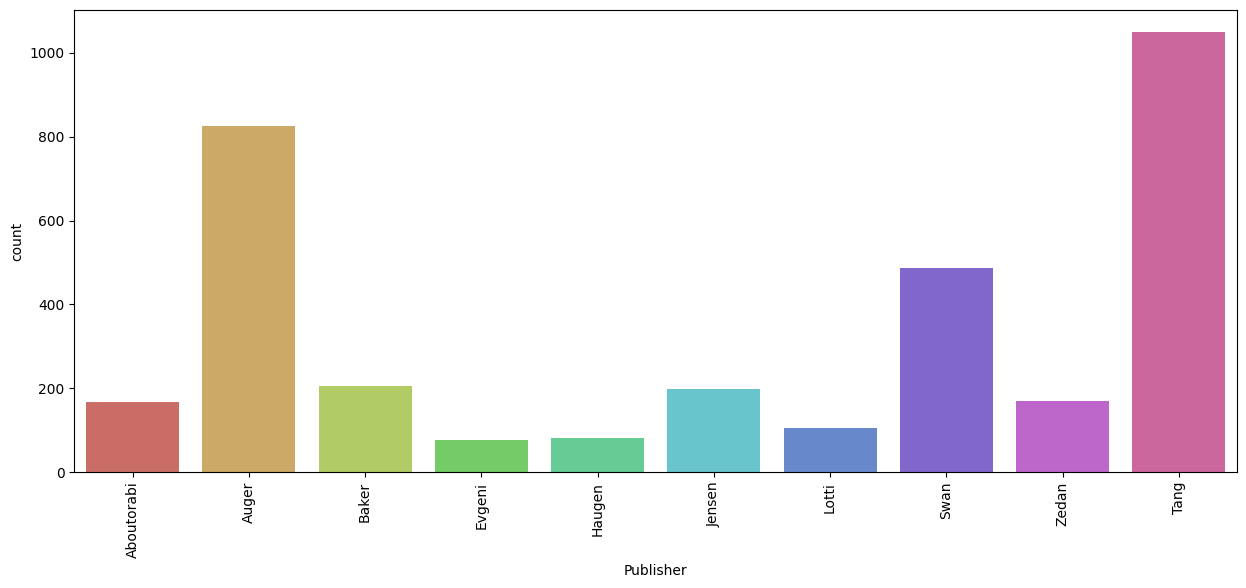

In [95]:
plt.figure(figsize=(15,6))
sns.countplot(x='Publisher', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

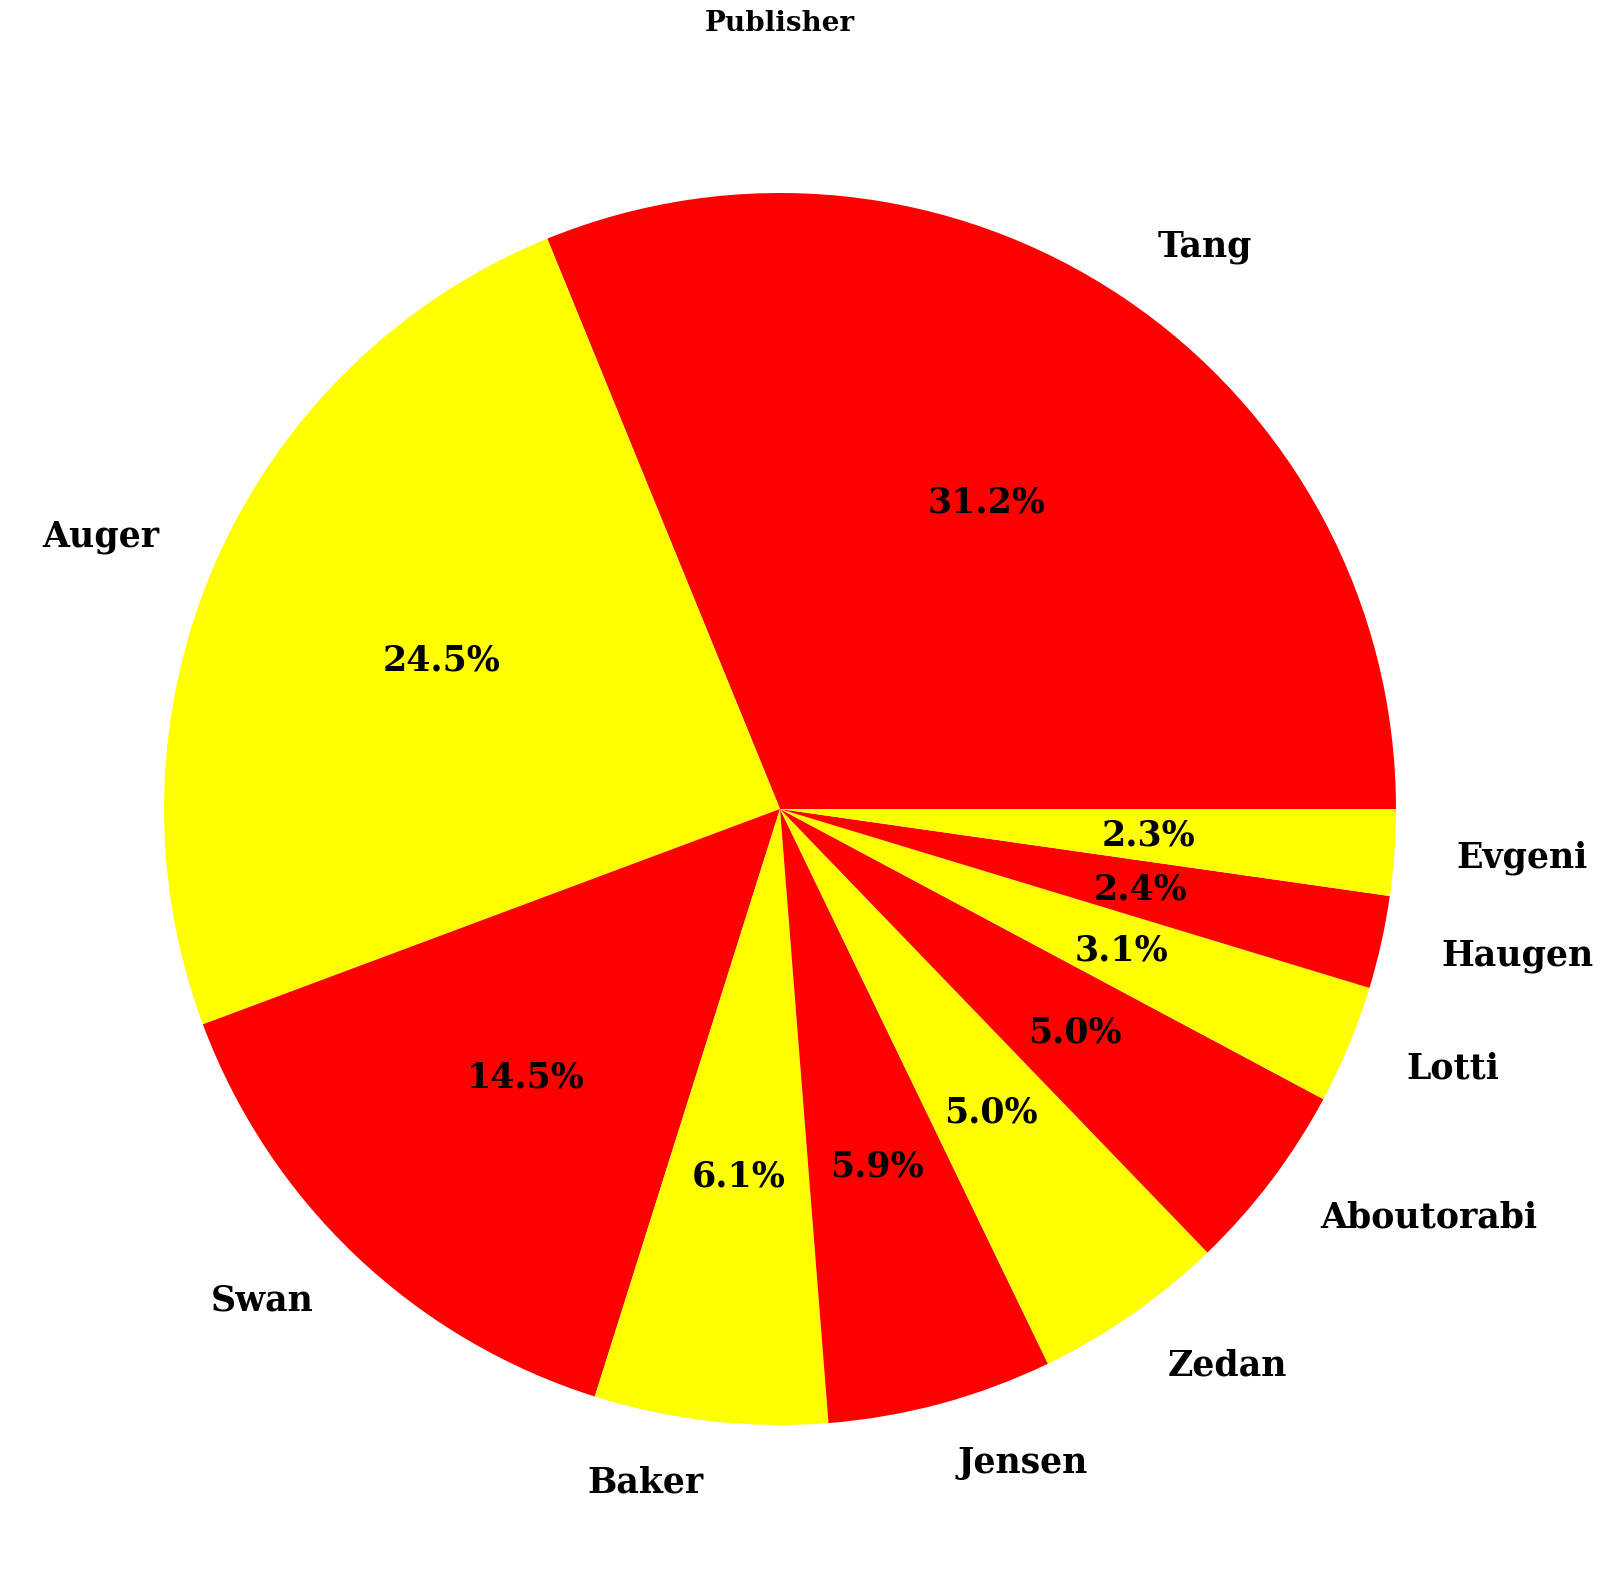

In [96]:
plt.figure(figsize=(30,20)) 
plt.pie(data['Publisher'].value_counts(), labels=data['Publisher'].value_counts().index, 
 colors = ['red', 'yellow'], autopct='%1.1f%%', textprops={ 'fontsize': 25,
 'color': 'black',
'weight': 'bold',
'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Publisher', size=20, **hfont) 
plt.show()


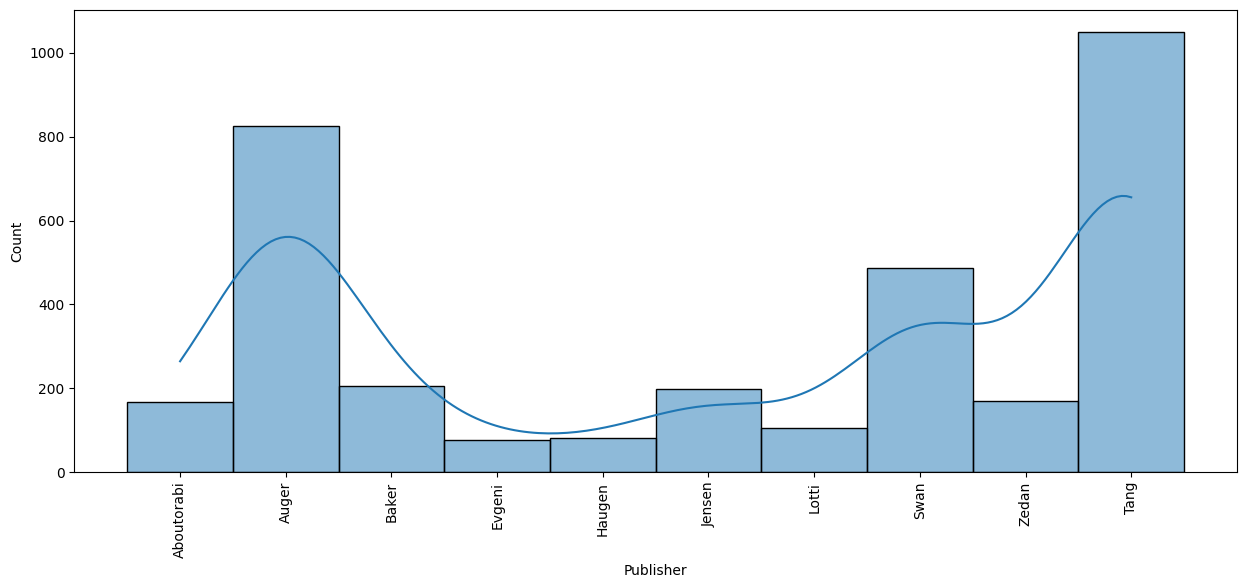

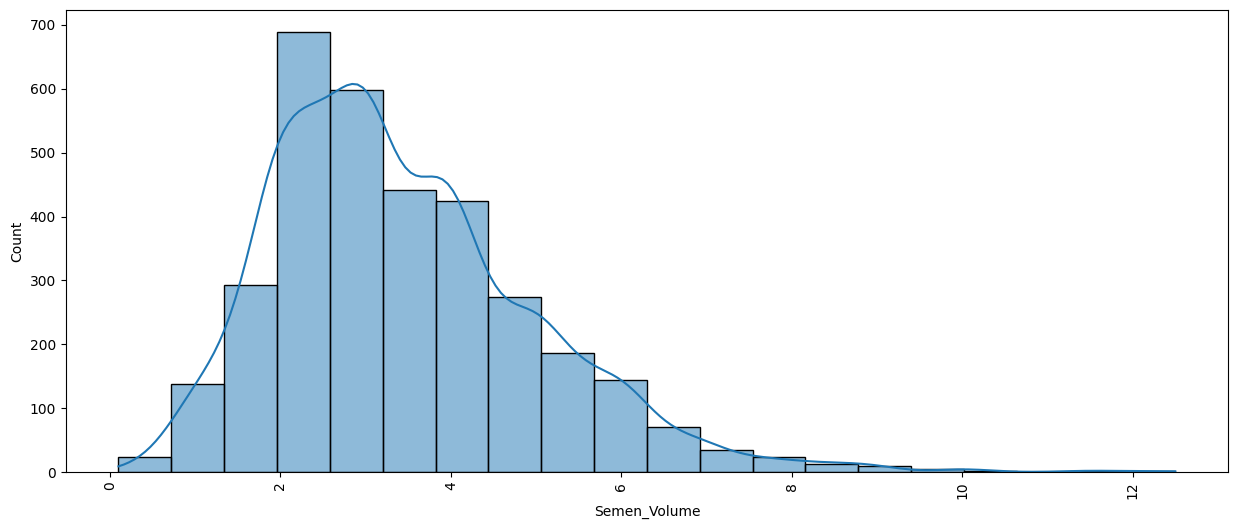

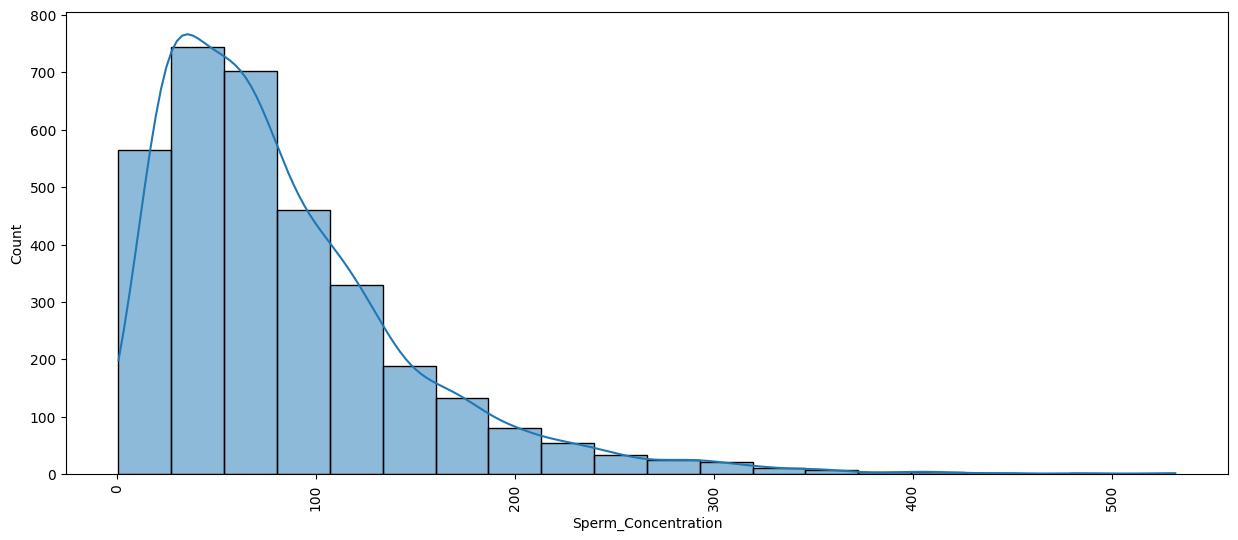

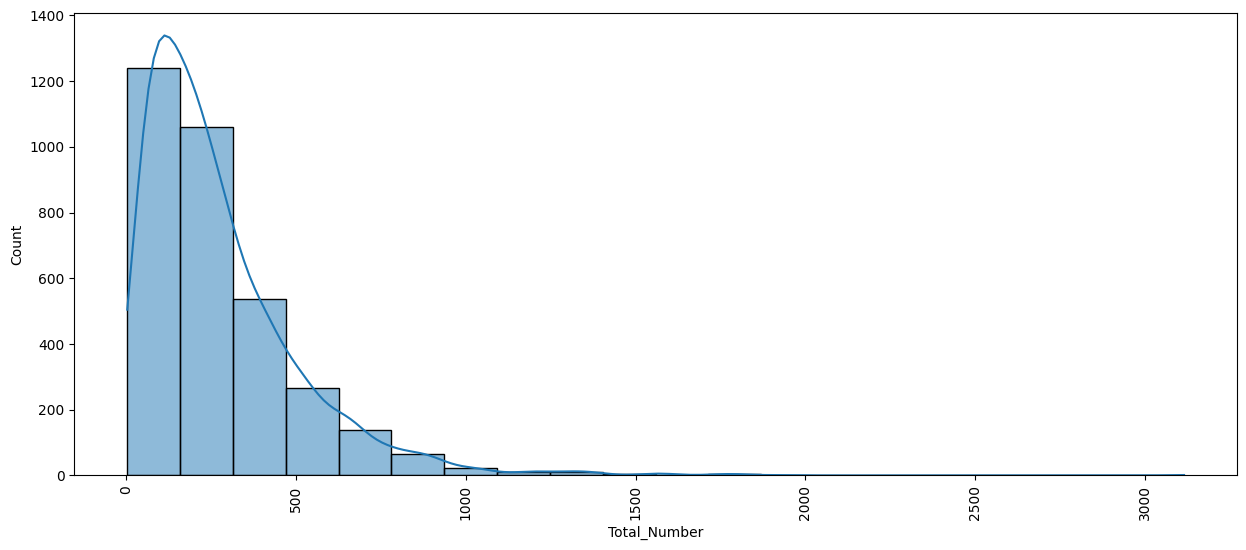

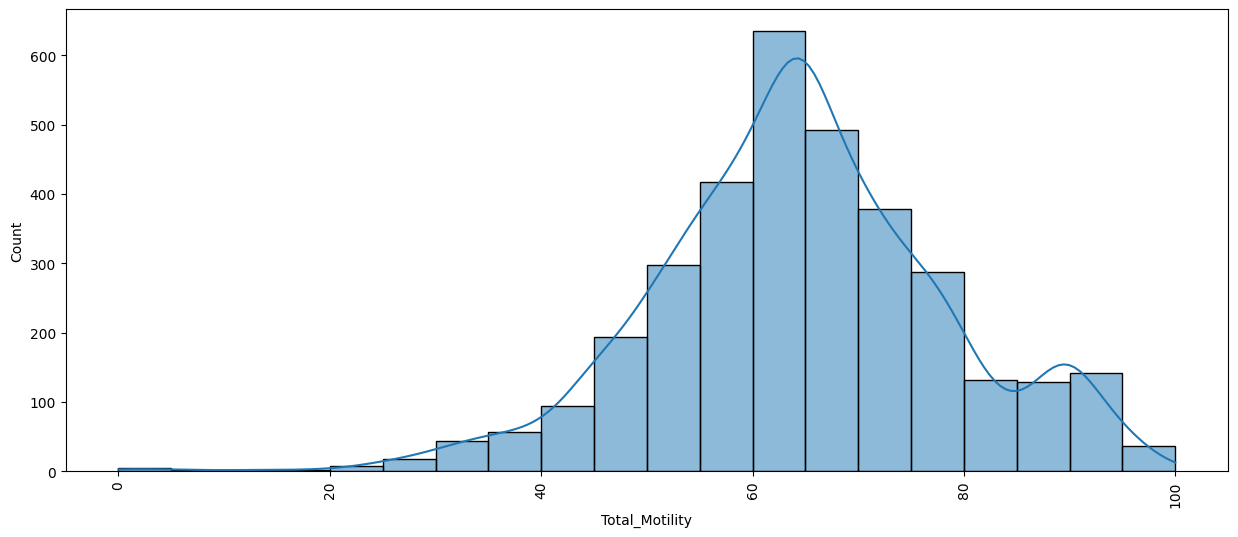

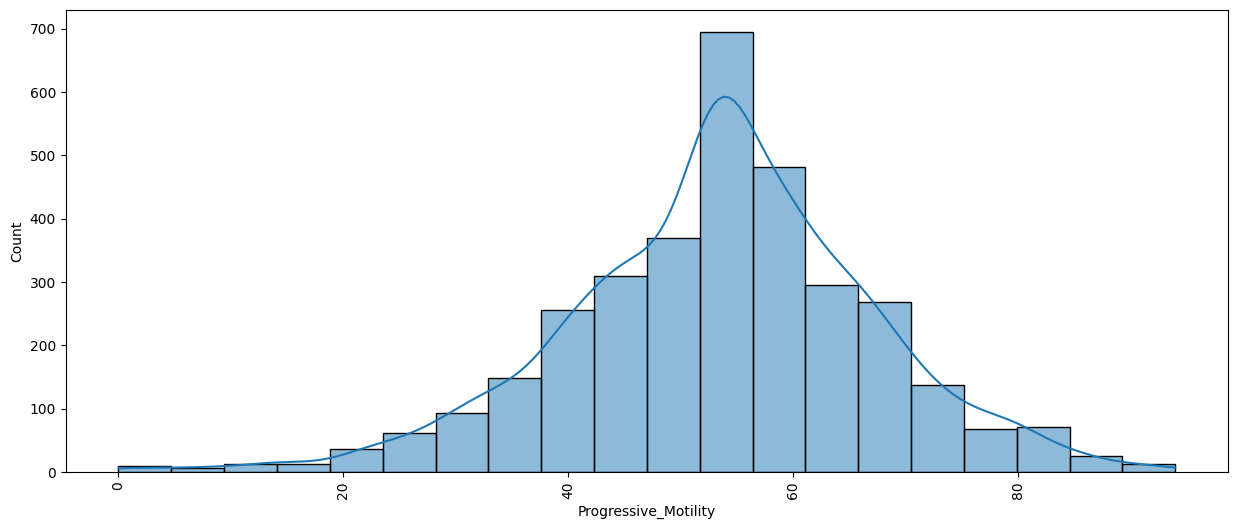

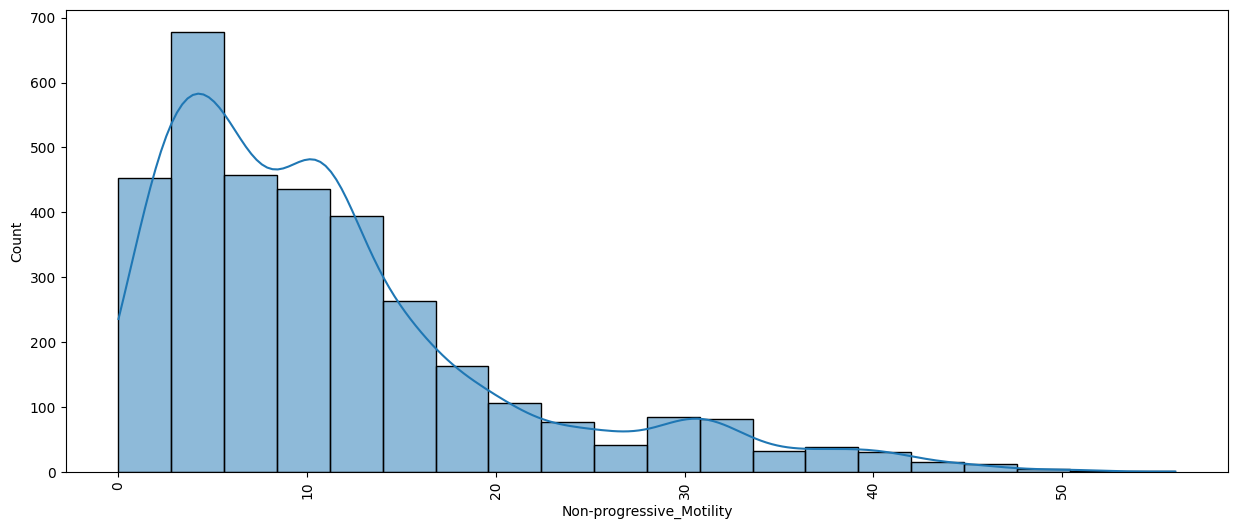

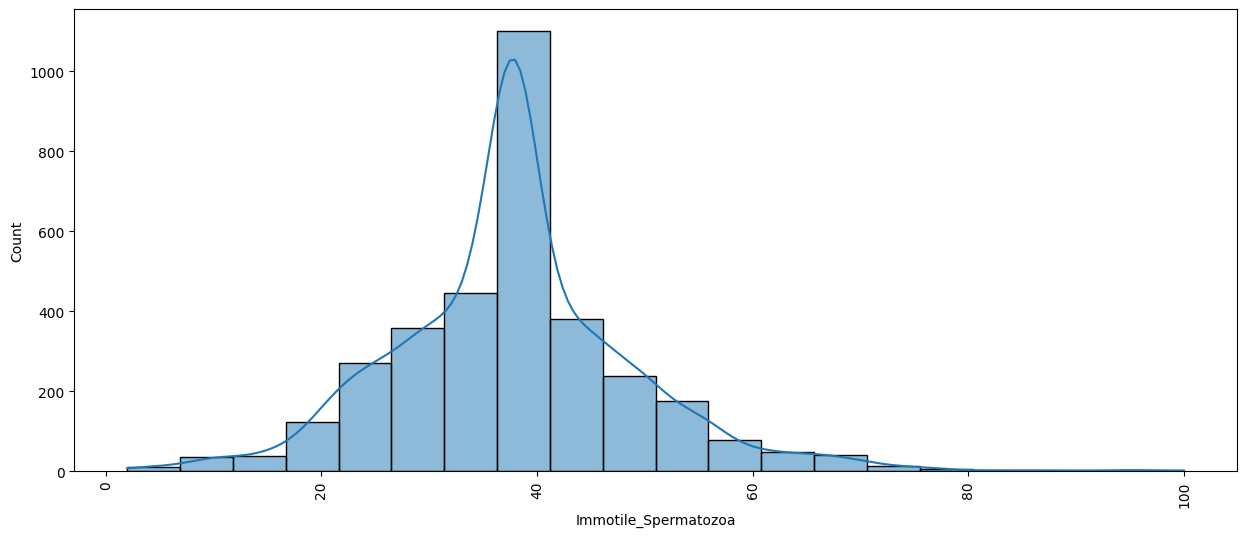

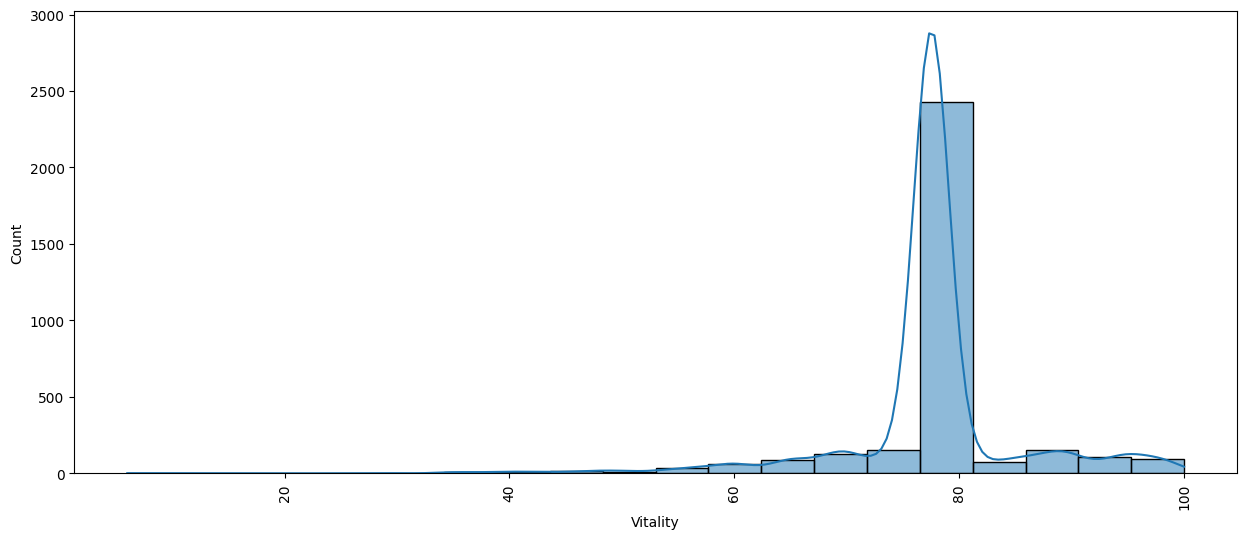

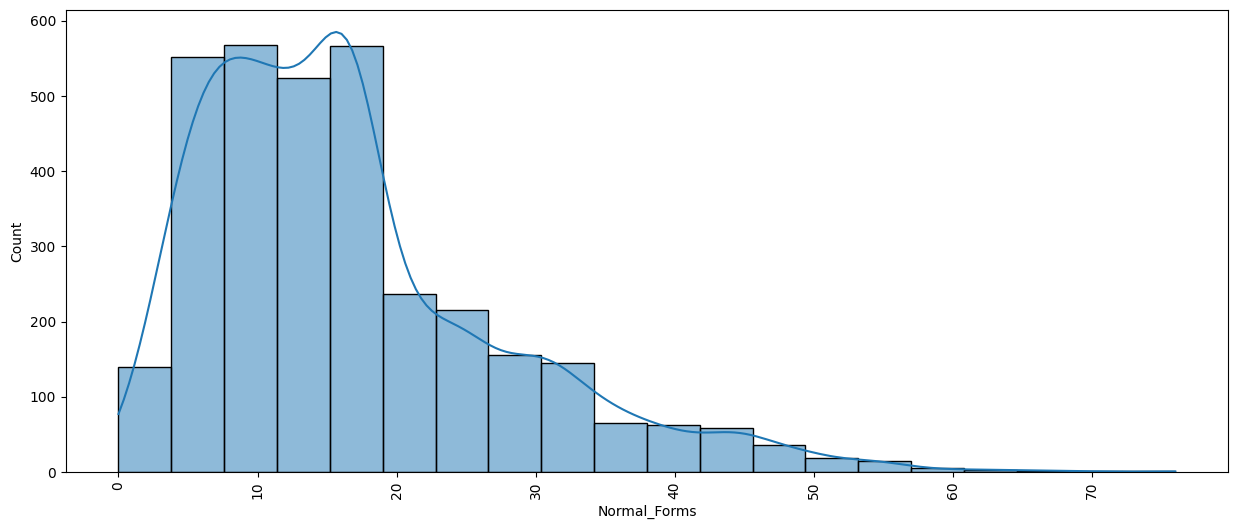

In [97]:
for i in data.columns:
 plt.figure(figsize=(15,6))
 sns.histplot(data[i], bins = 20, kde = True, palette = 'hls')
 plt.xticks(rotation = 90)
 plt.show()


In [98]:
corrmat = data.corr()
corrmat


,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
Semen_Volume,1.000000,-0.135339,0.392636,-0.047874,0.080760,-0.187138,-0.006569,-0.024202,-0.029995
Sperm_Concentration,-0.135339,1.000000,0.762438,0.051967,0.082727,-0.027122,-0.114687,0.002859,0.182508
Total_Number,0.392636,0.762438,1.000000,0.016472,0.119365,-0.139399,-0.080722,0.009120,0.156593
Total_Motility,-0.047874,0.051967,0.016472,1.000000,0.733139,0.311718,-0.796949,0.476842,0.070955
Progressive_Motility,0.080760,0.082727,0.119365,0.733139,1.000000,-0.371763,-0.605534,0.388891,0.159636
Non-progressive_Motility,-0.187138,-0.027122,-0.139399,0.311718,-0.371763,1.000000,-0.196501,0.138232,-0.025912
Immotile_Spermatozoa,-0.006569,-0.114687,-0.080722,-0.796949,-0.605534,-0.196501,1.000000,-0.118321,-0.042555
Vitality,-0.024202,0.002859,0.009120,0.476842,0.388891,0.138232,-0.118321,1.000000,0.106596
Normal_Forms,-0.029995,0.182508,0.156593,0.070955,0.159636,-0.025912,-0.042555,0.106596,1.000000


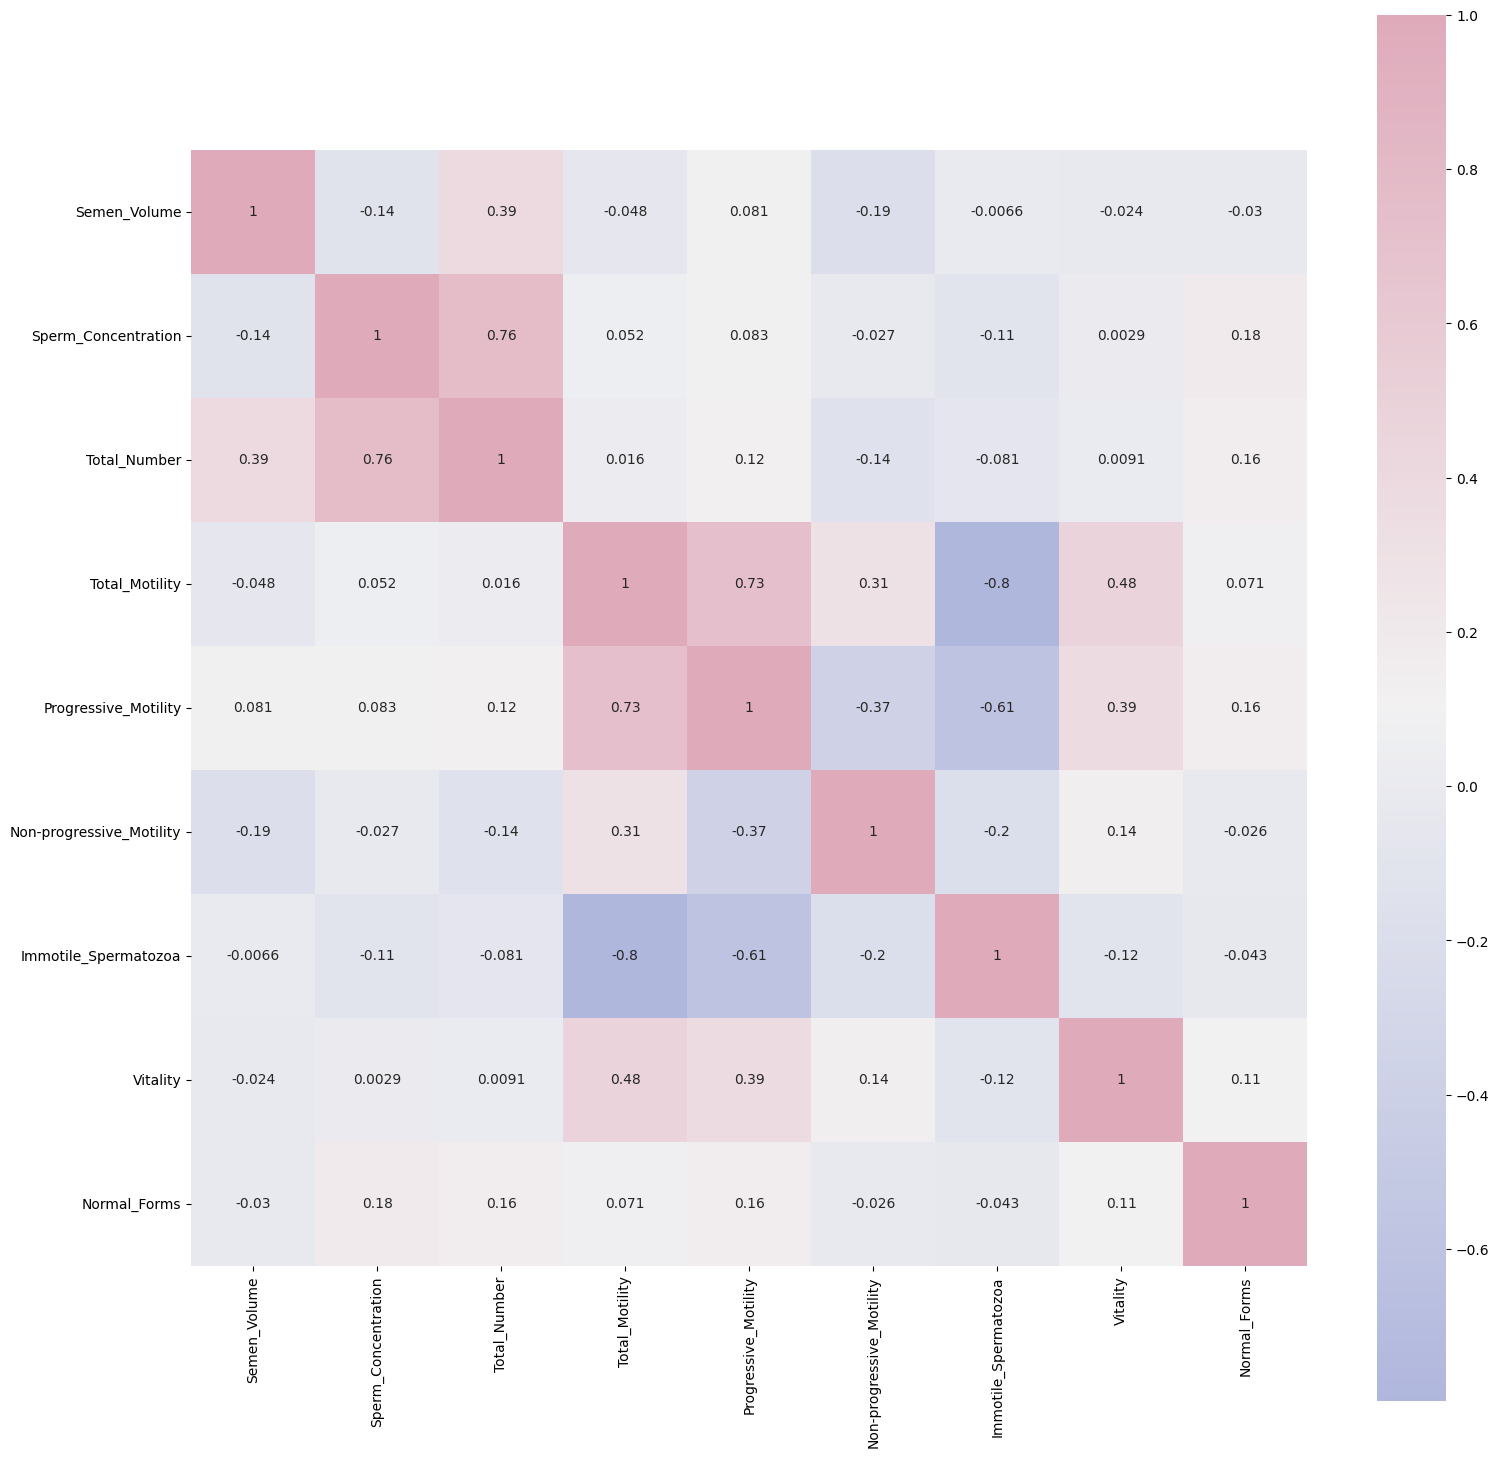

In [99]:
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, 
 as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)
plt.show()

In [100]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Semen_Volume                  1.910000
Sperm_Concentration          75.000000
Total_Number                258.136000
Total_Motility               17.000000
Progressive_Motility         17.000000
Non-progressive_Motility     10.601173
Immotile_Spermatozoa         11.000000
Vitality                      0.000000
Normal_Forms                 12.500000
dtype: float64


In [106]:
X = data.drop('Total Motility', axis=0)
y = data['Total Motility']


KeyError: "['Total Motility'] not found in axis"